In [1]:
import os
import sys

# Add the project's root directory to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
import random

import numpy as np
import torch

from SGLD_v7 import SgldBayesianRegression as V7
from models.linear import LinearRegression
from utils import generate_linear_data, plot_mse, plot_sigma_squared

# Set random seed for reproducibility
torch.manual_seed(42)
random.seed(42)
np.random.seed(42)
in_feature = 10


In [2]:
# Generate synthetic data
X, y, true_weights, true_bias = generate_linear_data(n=1000, in_features=in_feature, noise_std=1.0)

a_beta = 2.0
b_beta = 1.0
out_feature = 1
model=LinearRegression(in_features=in_feature, out_features=out_feature, a_beta=a_beta, b_beta=b_beta)

In [3]:
# Run SGLD
c = V7(
    model=model,
    step_size=0.0001,
    num_epochs=300,
    burn_in_epochs=0,
    batch_size=100,
)

In [4]:
c.train(X, y)

Epoch 1/300
time elapsed 0.00013494491577148438 seconds
Epoch 101/300
time elapsed 1.4271149635314941 seconds
Epoch 201/300
time elapsed 2.833744764328003 seconds


In [5]:
inputs = torch.ones(in_feature)
print(f'true_weight={true_weights} true_bias={true_bias}')
print(f'X={inputs} Y(predicted)={c.predict(inputs)} Y(expected)={sum(true_weights) + true_bias}')

true_weight=tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]) true_bias=-1.0
predict (sample_avg)::variance_prediction=[21.217745]
X=tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]) Y(predicted)=tensor([30.7140]) Y(expected)=54.0


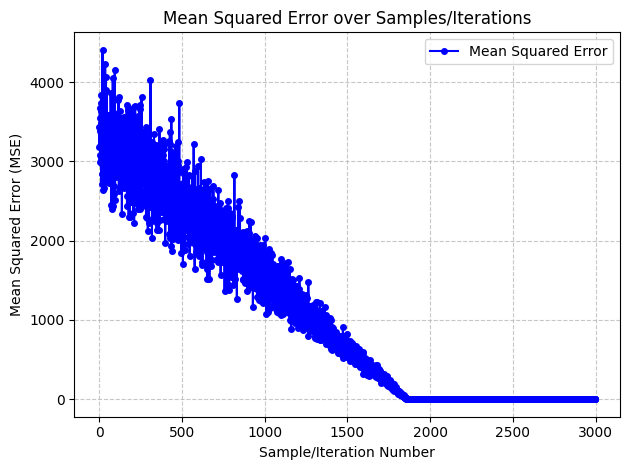

In [6]:
plot_mse(c)

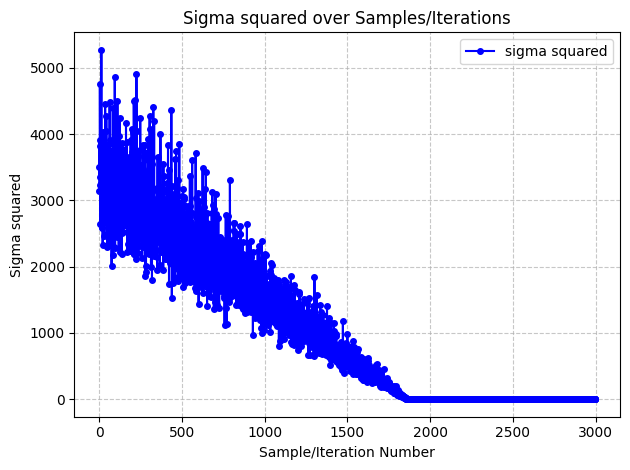

In [7]:
plot_sigma_squared(c)

In [8]:
print(f'X={inputs} Y(predicted)={c.predict(inputs, -1000,-1)} Y(expected)={sum(true_weights) + true_bias}')

predict (sample_avg)::variance_prediction=[0.10967901]
X=tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]) Y(predicted)=tensor([53.9781]) Y(expected)=54.0
